In [2]:
#import library
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score , confusion_matrix


from keras.layers import Dense, Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers,models,Model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [3]:
#Data PreProcessing
#Training Image processing
train_datagen = ImageDataGenerator(
                rescale=1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
                'train_data',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 2983 images belonging to 5 classes.


In [4]:
#Test image processing
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory('test_data',target_size=(150,150),batch_size=32,class_mode='categorical')

Found 2984 images belonging to 5 classes.


In [5]:
#Building Model
cnn = tf.keras.models.Sequential()

In [6]:
#Building Convolution Layer
#First layer
cnn.add(tf.keras.layers.Conv2D(filters=150,kernel_size=3,activation='relu',input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
#Second Layer
cnn.add(tf.keras.layers.Conv2D(filters=150,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
#Dropout
cnn.add(tf.keras.layers.Dropout(0.5))

In [9]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [10]:
#hiddden layer
cnn.add(tf.keras.layers.Dense(units=64,activation='relu'))

In [11]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [12]:
#For compile results
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
dataset = {
             "train_data" : r"C:\Users\ejaaz\Bird-Image-Classifier-master\content\train_data\train_data",
             "valid_data" : r"C:\Users\ejaaz\Bird-Image-Classifier-master\content\valid_data\valid_data",
             "test_data" : r"C:\Users\ejaaz\Bird-Image-Classifier-master\content\valid_data\valid_data",
          }

all_data = []
for path in dataset.values():
    data = {"imgpath": [] , "labels": [] }
    category = os.listdir(path)

    for folder in category:
        folderpath = os.path.join(path , folder)
        filelist = os.listdir(folderpath)
        for file in filelist:
            fpath = os.path.join(folderpath, file)
            data["imgpath"].append(fpath)
            data["labels"].append(folder)
        
        
    all_data.append(data.copy())
    data.clear()

    
    
train_df = pd.DataFrame(all_data[0] , index=range(len(all_data[0]['imgpath'])))
valid_df = pd.DataFrame(all_data[1] , index=range(len(all_data[1]['imgpath'])))
test_df = pd.DataFrame(all_data[2] , index=range(len(all_data[2]['imgpath'])))


# #Convert labels to numbers
lb = LabelEncoder()
train_df['encoded_labels'] = lb.fit_transform(train_df['labels'])
valid_df['encoded_labels'] = lb.fit_transform(valid_df['labels'])
test_df['encoded_labels'] = lb.fit_transform(test_df['labels'])

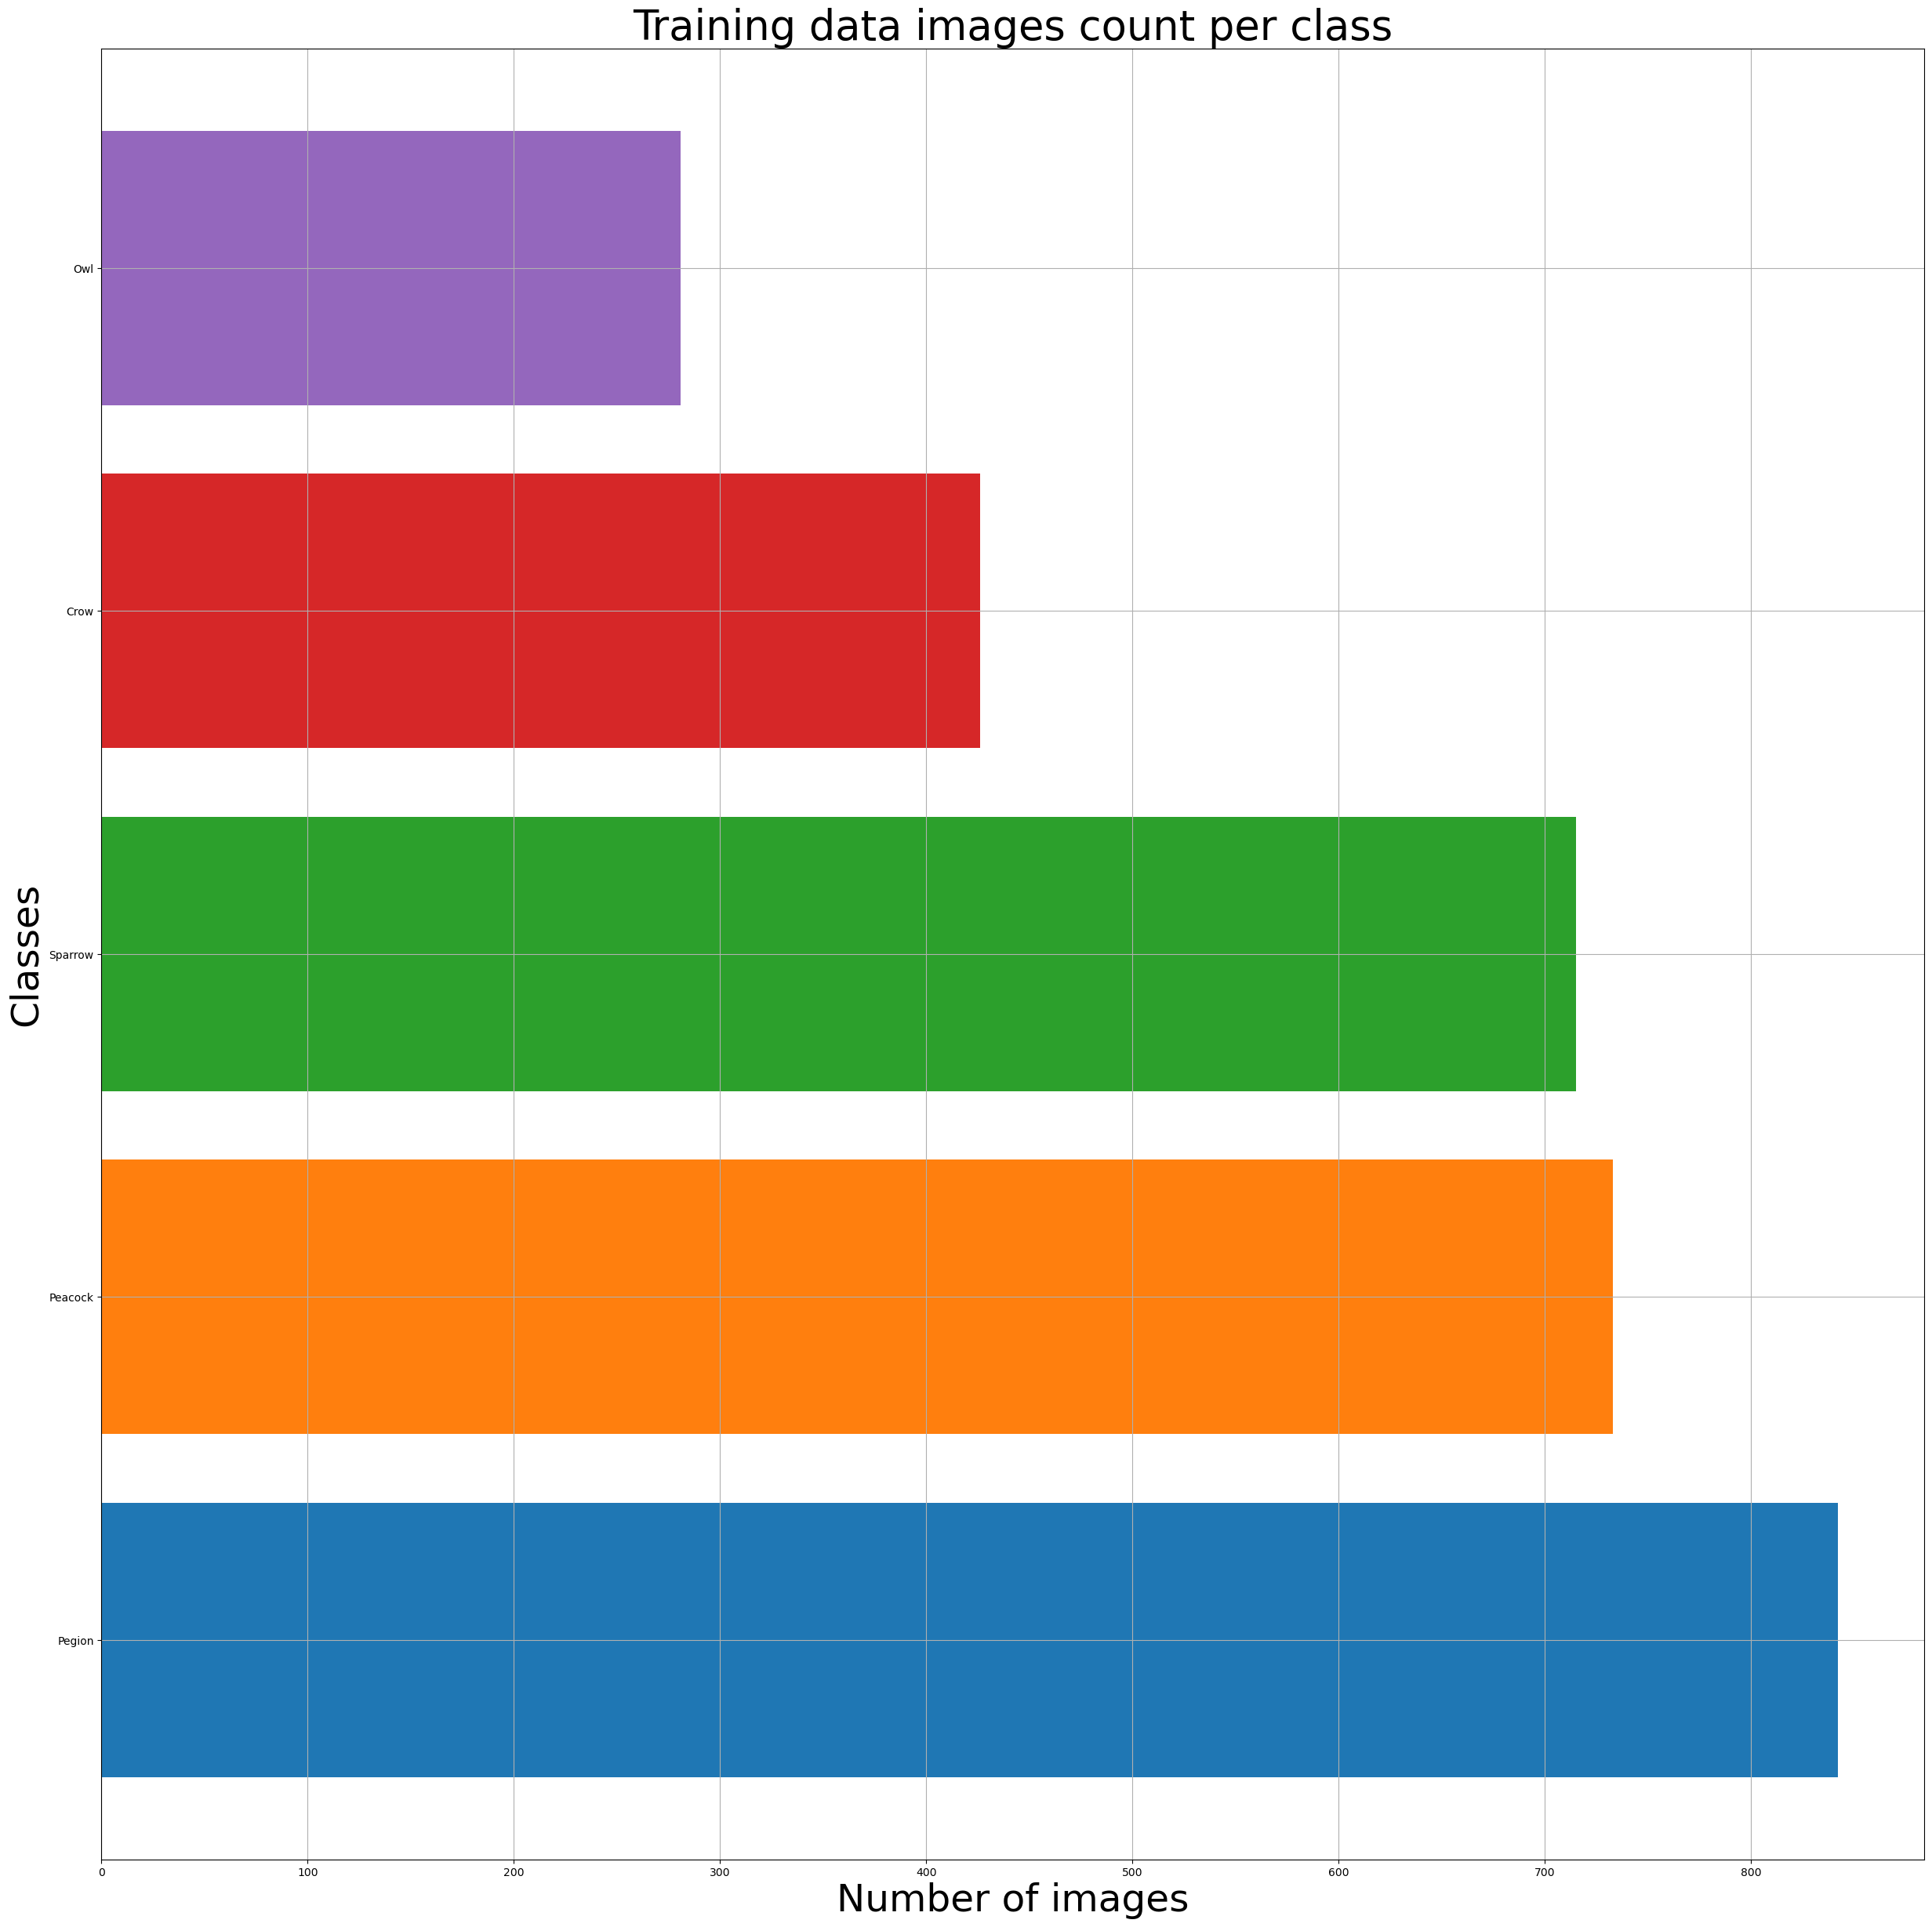

In [14]:
train  = train_df["labels"].value_counts()
label = train.tolist()
index = train.index.tolist()

colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#5254a3", "#6b6ecf", "#bdbdbd", "#8ca252", "#bd9e39",
    "#ad494a", "#8c6d31", "#6b6ecf", "#e7ba52", "#ce6dbd",
    "#9c9ede", "#cedb9c", "#de9ed6", "#ad494a", "#d6616b",
    "#f7f7f7", "#7b4173", "#a55194", "#ce6dbd"
]



plt.figure(figsize=(30,30))
plt.title("Training data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)
plt.barh(index,label, color=colors)
plt.grid(True)
plt.show()

In [15]:
train_df.sample(n=15, random_state=1)

,imgpath,labels,encoded_labels
748,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Peacock,2
2881,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Sparrow,4
1391,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Peacock,2
2297,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Sparrow,4
2952,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Sparrow,4
393,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Crow,0
28,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Crow,0
99,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Crow,0
351,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Crow,0
1270,C:\Users\ejaaz\Bird-Image-Classifier-master\co...,Peacock,2


In [16]:
print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("--------Validation----------")
print(valid_df[["imgpath", "labels"]].head(5))
print(valid_df.shape)
print("----------Test--------------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

----------Train-------------
                                             imgpath labels
0  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
1  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
2  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
3  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
4  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
(2997, 3)
--------Validation----------
                                             imgpath labels
0  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
1  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
2  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
3  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
4  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
(2997, 3)
----------Test--------------
                                             imgpath labels
0  C:\Users\ejaaz\Bird-Image-Classifier-master\co...   Crow
1  C:\Users\ejaaz\Bird-Image-Classifier-master\co... 

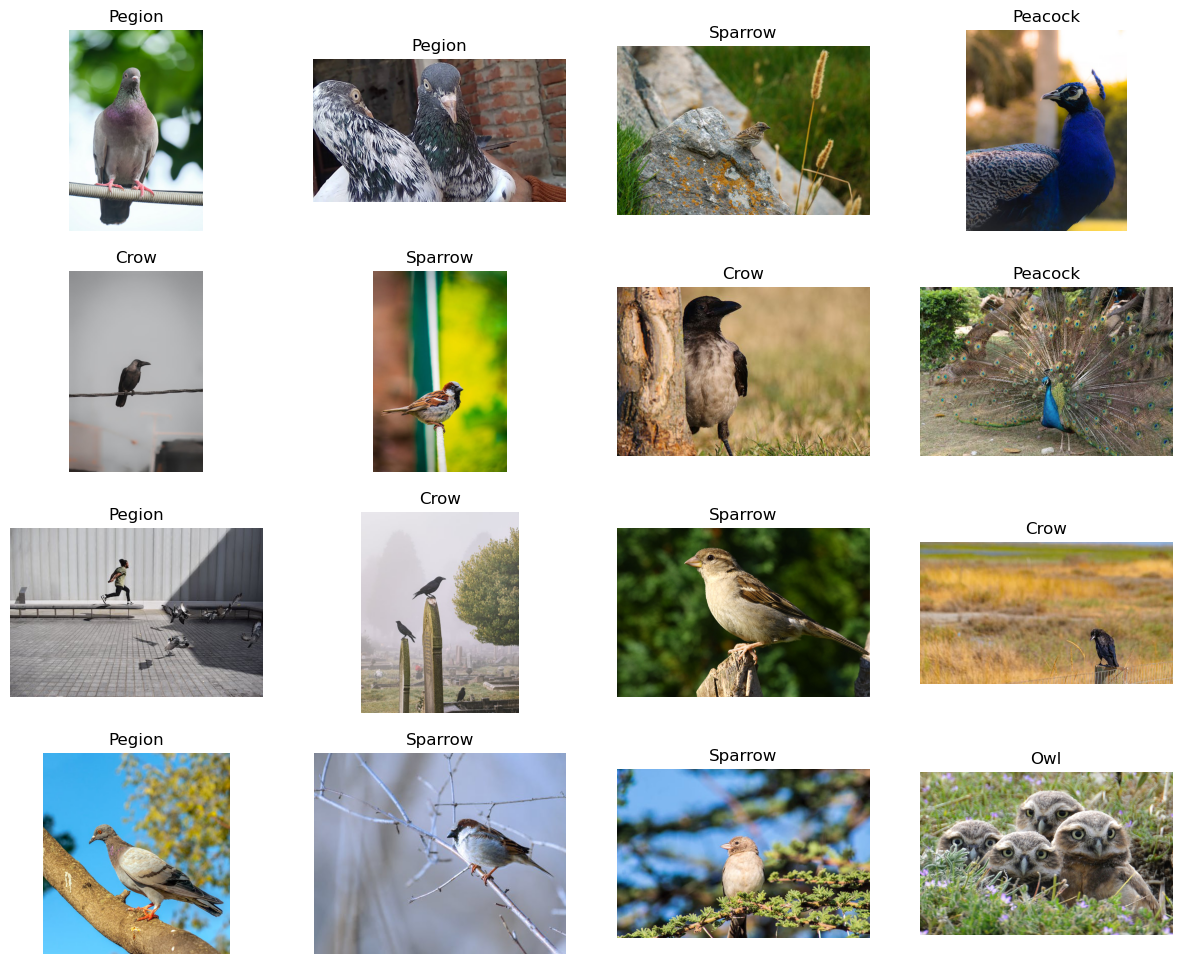

In [17]:
plt.figure(figsize=(15,12))
for i, row in valid_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

In [ ]:
model = cnn.fit_generator(
    training_set,
    steps_per_epoch=2000 // 16,
    epochs=50,
    validation_data=test_data,
    validation_steps=50
)

cnn.save("modelnewS.h5")

C:\Users\ejaaz\AppData\Local\Temp\ipykernel_1208\4201942873.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model = cnn.fit_generator(


Epoch 1/50
  4/125 [..............................] - ETA: 11:40:09 - loss: 1.0104 - accuracy: 0.3047

In [15]:
#Preprocess New Image
from keras.preprocessing import image
test_image = tf.keras.utils.load_img('Prediction/wr.jpeg',target_size=(64,64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)
training_set.class_indices

{'Crow': 0, 'Owl': 1, 'Peacock': 2, 'Pegion': 3, 'Sparrow': 4}

In [16]:
if result[0][0]==1:
    print('Crow')
elif result[0][1]==1:
    print('Owl')
elif result[0][2]==1:
    print('Peacock')
elif result[0][3]==1:
    print('Pegion')
elif result[0][4]==1:
    print("Sparrow")

Sparrow


In [45]:
cnn.save("modelnewtest.h5")